# Linear Regression

### Testing the Normal Equation
- This Equation is used to determine the value (0) that minimizes the cost fuction, a solution that gives the answer directly.
- We will generate some linear looking data to test this equation.

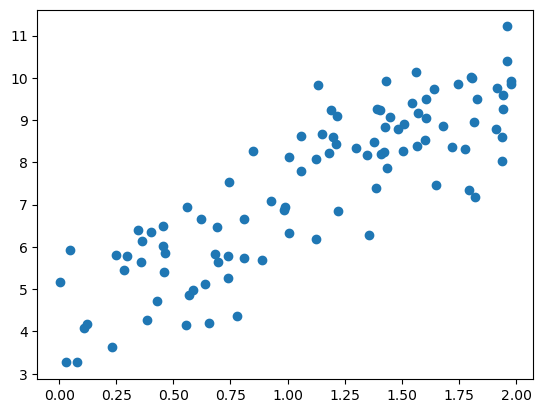

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1) # rand-generate random floats between 0 and 1 with 100 rows and 1 column * 2 so numbers btwn 0 and 2
y = 4 + 3 * X + np.random.randn(100, 1) #randn generates normall distributed data, mean of 0 s.d of 1

# The code essentially creates a linear relationship between X and y with some added noise. The slope of this relationship is determined by 
# the coefficient 3 (in 3 * X), and the constant term is 4 (in 4 + ...). The noise term (np.random.randn(100, 1)) adds variability to the y values, 
#making the relationship appear less perfect.

plt.scatter(X, y)

In [2]:
# The data was generated by the equation y = 4 + 3x +  Gaussian noise.

X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

# we should hope answers 4 and 3 so as to recover the original parameters but this will be tricky considering the noise

array([[4.31595691],
       [2.80537268]])

In [3]:
# using the theta_best to make predictions.

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.31595691],
       [9.92670227]])

#### Summary so far.
- we have trained a linear regression model represented by the weights theta_best.
- we have new data points with the features values in X_new
- we added a bias term to the new data (X_new_b) to match the model's format.
- we multiply the new data with bias(X_new_b) by the model weights(theta_best) to get predictions for the target variable(y_predict)
- the values in y_predict represent the model's estimated target variable values for the given new feature values.

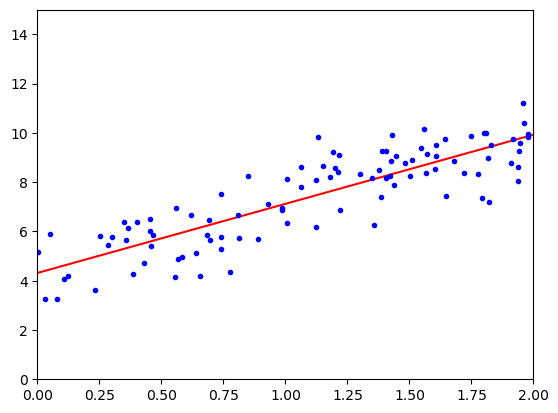

In [4]:
# Let's plot the model's predictions.

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

### Recreating the same process using scikit-learns linear regression model.

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.31595691]), array([[2.80537268]]))

In [6]:
lin_reg.predict(X_new)

array([[4.31595691],
       [9.92670227]])

- The linearregresiion equation is based off of scipy.linalg.lstsq() function (the least square) which can be called direcly as:

In [7]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.31595691],
       [2.80537268]])

In [8]:
# the above function simply computes the pseudoinverse of X ( the Moore-Penrose inverse)
# we can use the np.linalg.pinv() to compute the pseudoinverse directly:

np.linalg.pinv(X_b).dot(y)

array([[4.31595691],
       [2.80537268]])

- The pseudoinverse itself is computed using a standard matrix factorization technique called `Singular Value Decomposition`
- Computing the pseudoinverse is more efficient than computing the Normal Equation, it handles edge cases nicely, the Normal Equation
may not work if the matrix is singular (non-invertible) such as if m < n or if some features are redundant, but the pseudoinverse is always defined.

## Gradient Descent

- The general Idea is to tweak parameters iteratively to minimize a cost function.
- It does this by measuring the local gradient of the error fuction with regard to the parameter vector 0, and it goes in the direction
of descendng gradient. Once the gradient is zero we have reached a minimum.
- The model parameters are initialized randomly and get tweaked repeatedly to minimize the cost function, the learning step size is proportional to the slope of the cost function, so the steps gradually get smaller as the parameters approach the minimum.
- If the learning rate is too high you might jump across the valley which may make the algorithm diverge ending up with larger values every time failing to find a good solution.
- Depending on where you start ypu might end up at a local minimum instead of the global minimum -  if the learning stops too early we might never reac the global minimum.
- When using gradient decent you should ensure that all features have similar scale (using the StandardScaler class) or else it will take much longer to converge.
- Since the const function is convex in the case of a linear regression model ,the answer is simply at the bottom.

### Batch Gradient Descent
- Using partial derivatives we can calculate the gradient of the cost function with regard to each model parameter.
- This algorithm involves calculations over the full training set X, which will be very slow for large datasets but since it scales well its much faster than Normal Equation or SVD decomposition.
- Using the learning rate n we can determine the size of the downhill step needed.

In [9]:
# quick implementation of the algorithm.

eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) #random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[4.31595691],
       [2.80537268]])

- We can use grid serach to find a good learning rate , however we'll have to limit the number of iterations so the grid search can eliminate 
models that take too long to converge.
- A simple solution is to set a very high number of iterations but to interrupt the algorithm when the gradient vector becomes tiny - when the norm
becomes smaller than a tiny number e called the `tolerance` which normally happens when Gradient Descent hs (almost) reached the minimum.
- Dividing the tolerance by 10 may result in the algo taking about 10 times longer.

### Stochastic Gradient Descent

- Unlike the Batch Gradient Descent this picks a random instance in the training set at every step and computes the gradients based on a 
single instance in the training set and computes the gradients based on that single instance.
- It can be implemented as an out-of-core algorithm.
- The algorithms bounces around but once it settles the results are final parameter values are good but not optimal.
- It has a better chance of finding the global minimum point on the count of its bouncing around.
- The best solution to using it is gradually decreasing the learning rate so it settles at the minimum point - a process akin to `simulated annealing`.
- The function that determines the learning rate at each iteration is called `learning schedule`.

In [10]:
# Implementing the Stochastic Gradient Descent.

n_epochs = 50
t0, t1 = 5, 50  #learning schedule parameters.

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)   #random initialization.

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta

array([[4.31798467],
       [2.83221973]])

- The algorithm may not go through the entire data, to solve this you might want to shuffle the input features and the labels jointly
then go through it instance by instance the shuffle it again and so on, it will converge more slowly at this rate.

In [11]:
# Implementing this is Scikit-learn

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.28875762]), array([2.79692877]))

### Mini-batch Gradient Descent

- The algorithm's progress space is less erratic than with Stochastic GD especially with fairly large minibatches
- It computes the gradients on small random sets of instances called `mini-batches`. The main advantage is that we get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

## Polynomial Regression

- This is done by adding powers of each feature as new features, then train a linear model on this extended set of features

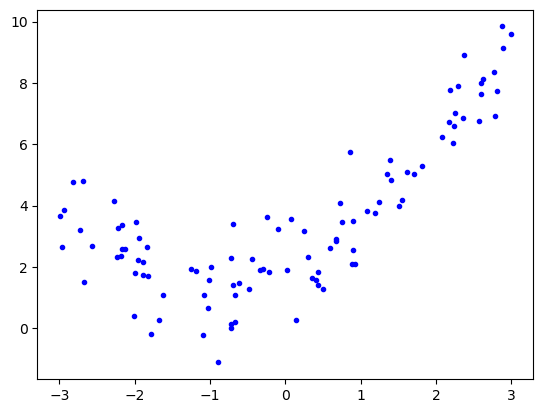

In [12]:
# Generating nonlinear data based on a simple quadratic equation.

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.show()

In [13]:
# Using Scikit-learn's PolynomialFeatures class we can transform our training data, adding the square (second-degree polynomial
# of each feature in the training set as a new feature.

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-1.03301954])

In [14]:
X_poly[0]

array([-1.03301954,  1.06712936])

In [15]:
# X_poly now contains the original feature X plus the square of this feature. Now we can fit a LinearRegression model to this extended training data.

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.88865636]), array([[0.96298261, 0.53433784]]))

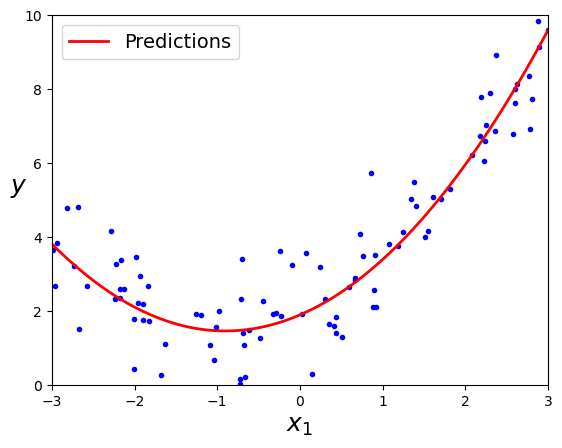

In [16]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

- Polynomial regression is capable of finding relationships between features that sometime the normal linear models cannot do.
- This is because it adds the combinations of features up to the given degree.

## Learning Curves

- The following demonstrates how using a very high degree polynomial regression model can severely overffit the data.
- The Linear regression model is shown to underfit the data.
- The quadratic model is shown to have the correct fit but thats because we knew the data was quadratically generated.

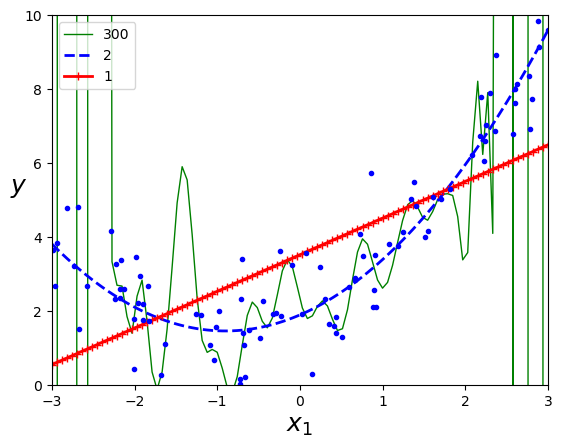

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

- Using learnin curves we can plot a model's performance on the training set and validation set as a function of the training set size.

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)  

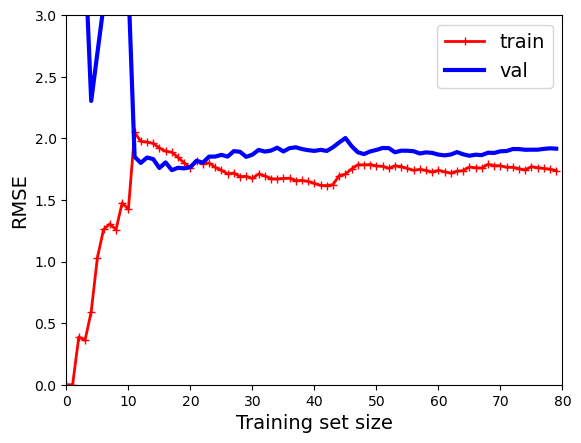

In [19]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
plt.show() 

- The model abover is underfitting, this cannot be solved by adding more data but by choosing a more complex model.

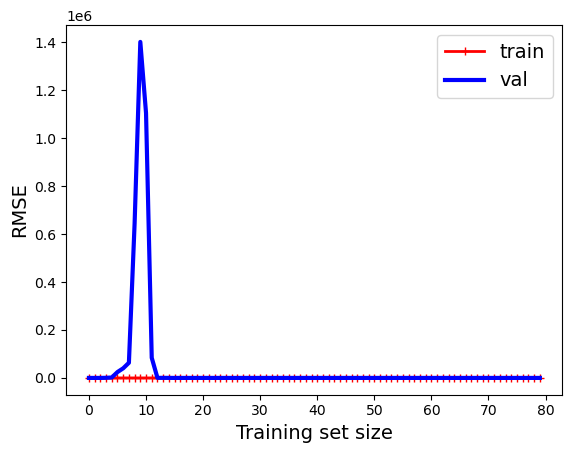

In [20]:
# Implementing a 10-degree polynomial on the same data.

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

- This is much better the fact the model gets better, close and lower, if there was a larger gap between the graphs we would say the model has overfitted

## Regularized Linear Models

- A simple way to regularize a apolynomial model is to reduce the number of polynomial degress.
- For a linear model, regularization is typically achieved by constraining the weights of the model.

### Ridge Regression (Tikhonov regularization)
- This forces the learning algorithm to not only fit the dta but also keep the weights as small as possible.
- The regularization term should only be added to the cost function during training once done we should use the unregularized performance measure to evaluate the model's performance.
- Whe the alpha is 0, its a normal linear regression model, when its very high all weights end up very close to 0 resulting in a flat line going through the data's mean.

In [21]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [22]:
# Performing ridge regression with scikitlearn using closed-form solution.

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [23]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55072189]])

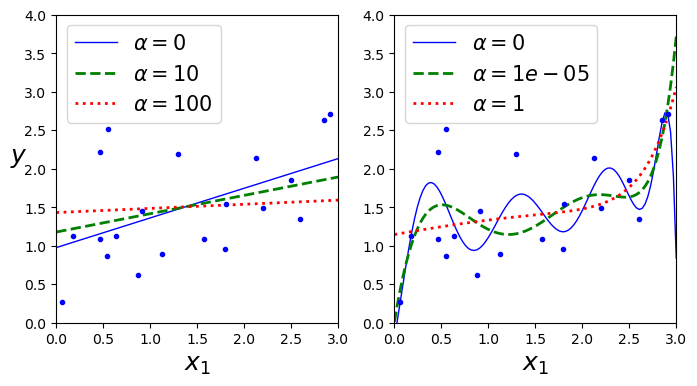

In [24]:
# we can see how the polynomial model varies less with regularization even though its biased.

from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()

In [25]:
# Ridge regression using Stochastic Gradient Descent.

sgd_reg  = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.46619232])

 Specifying
"l2" indicates that you want SGD to add a regularization term to the cost function
equal to half the square of the ℓ2
 norm of the weight vector: this is simply Ridge
Regression.

### Lasso Regression (least absolute shrinkage and selection operator regression)

-  Just like Ridge
Regression, it adds a regularization term to the cost function, but it uses the ℓ1 norm
of the weight vector instead of half the square of the ℓ2
 norm

C:\Users\arnol\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


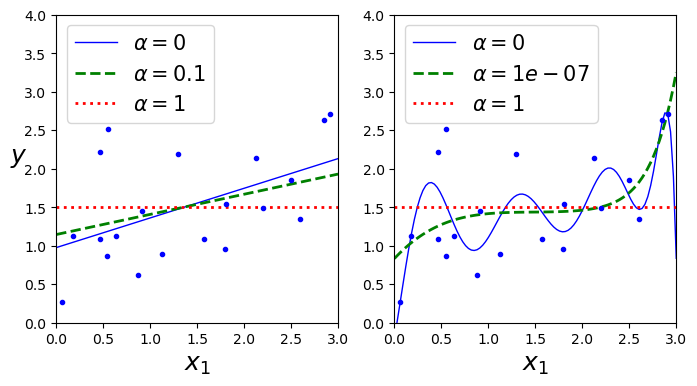

In [26]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)
plt.show()

- Lasso regressiontends to eliminate te weights of the least important features(set them to 0)
- The green on the right looks quadratic almost linear - lasso regression performs feature selection and outputs a `sparse model` (with few non-zero weights)

In [27]:
# An example using Lasso class:

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

### Elastic Net.
- This is a simple mix of both Ridge and Lasso's regularization terma and we can control the mix ratio r. When r=0, Elastic Net is equivalent to Ridge Regression and when r = 1, it is equivalent to Lasso Regression.

- Elastic is prefered over Lasso as laso may behave erratically when when the number of features is greater than the number of training instances or when several features are strongly correlated.

In [28]:
# An example.

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

## Early Stopping
- This involves stopping a model  when the validation score reaches the lowest, just before the model starts overfitting the data.
- This is called `early stopping` usually used when regularizing iterative learning algorithms such as Gradient Descent.

In [29]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

## Logistic Regression

- This regression model is used for classification tasks outputing the logistic of the result.

### Training and cost function.
- Objective of training is to set the parameter vector 0 so that the model estimates high probabilities for positive instances and low probabilities for negative instances.
- There is no equivalent of the Normal Equation but the cost function is convex, so Gradient Descent ( or any other optimization algorithm ) is guarantedd to find the global minimum.

In [30]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(int) # 1 if Iris virginica, else 0

In [31]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)


LogisticRegression()

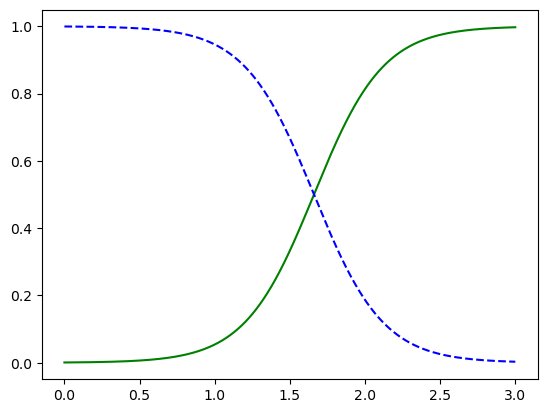

In [32]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")


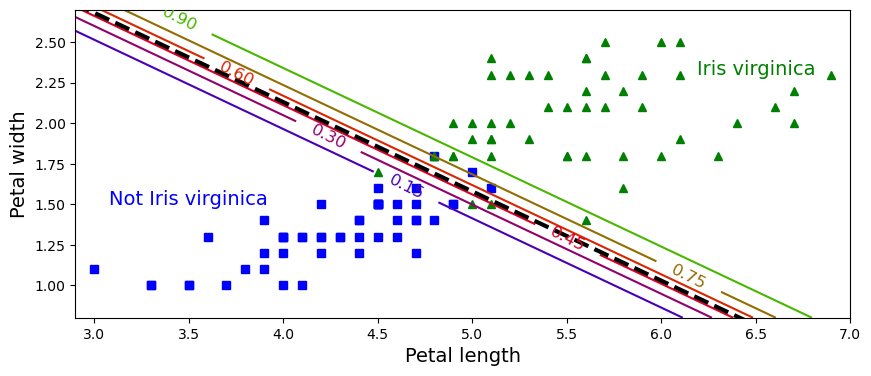

In [33]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

## Softmax Regression
- This involves generalizing a logistic regression model to support multiple classes directly without having to train and combine multiple binary classifiers.

In [34]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)


LogisticRegression(C=10, multi_class='multinomial')

In [35]:
softmax_reg.predict([[5, 2]])
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

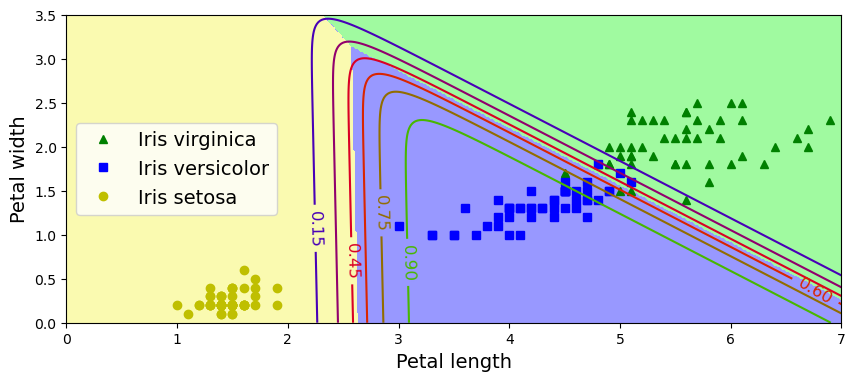

In [36]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()